# House Price Prediction

## 📌 California Housing Dataset Overview

1. Source:

- Published by the US Census Bureau.

2. Geographic Scope:

- Data is collected for block groups in California (the smallest geographical unit used by the Census Bureau).

3. Features (Metrics):

- The dataset contains 10 attributes, including:

  - Population

  - Median income

   - Median house value

   - Total rooms

    - Total bedrooms

   - Housing median age

    - Households

   - Latitude and longitude

    - Ocean proximity (categorical)

Use Case:

   - Serves as a base for building machine learning models, especially regression models to predict housing prices.

5. Project Purpose:

   - Helps in project scoping, by understanding:

       - Data cleaning requirements

       - Feature engineering steps

       - Modeling challenges and objectives

6. Functional Requirements (FR):

    - Load and preprocess raw housing data
    - Handle missing values and outliers

    - Encode categorical features (e.g., ocean_proximity)

    - Scale/normalize numerical features

    - Train a regression model (e.g., Linear/Ridge/Random Forest)

    - Evaluate model performance (R², MAE, etc.)

7. Non-Functional Requirements (NFR):

- Ensure code modularity and readability

- Maintain high data preprocessing efficiency

- Scalable for use on larger regional datasets

- Ensure model interpretability and reproducibility

- Data privacy and ethical use of census data

8. Outcome:

  - Build a reliable prediction pipeline for housing prices

  - Assist in policy planning, real estate analysis, and urban development


# EDA 

## Install Necessary Libraries

In [2]:
! pip install pandas

In [3]:
! pip install numpy

In [4]:
! pip install matplotlib

In [5]:
! pip install scikit-learn


In [6]:
!pip install seaborn

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer ## Handling Missing Values
from sklearn.preprocessing import StandardScaler ## Feature Scaling / Normalization

## Data Ingestion 

In [8]:

df = pd.read_csv(r"C:\Users\sujen\OneDrive\Desktop\Ad_project\ML_Project\House_Price_Prediction\Notebook\Data\1553768847-housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [11]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

## After analyse longitude and latitude not neede for Prediction of price so I Drop Out

In [8]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [9]:
df.drop(['longitude','latitude'],axis = 1 , inplace= True)

In [10]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### One-hot encode 'ocean_proximity' column

In [11]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

##### 💡 What This Code Does:
- pd.get_dummies(...)
  - ➤ Converts categorical column ocean_proximity into one-hot encoded columns (binary 0/1 format).

- columns=['ocean_proximity']
  - ➤ Tells pandas which column to encode.

- drop_first=True
  - ➤ Drops the first category (usually alphabetically) to avoid multicollinearity (important for linear models).



🧠 Example:
- Suppose our ocean_proximity column had:
- ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

- Then with drop_first=True, you'll get:

| index | ocean\_proximity\_<1H OCEAN | ocean\_proximity\_INLAND | ocean\_proximity\_ISLAND | ocean\_proximity\_NEAR OCEAN |
| ----- | --------------------------- | ------------------------ | ------------------------ | ---------------------------- |
| 0     | 1                           | 0                        | 0                        | 0                            |
| 1     | 0                           | 1                        | 0                        | 0                            |
| 2     | 0                           | 0                        | 1                        | 0                            |
| ...   | ...                         | ...                      | ...                      | ...                          |




✅ Summary:

Makes categorical data usable for ML models.

drop_first=True → saves one column and avoids dummy variable trap (perfect multicollinearity).

Good for linear models like regression.

In [12]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [13]:
df_encoded.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,129.0,322,126,8.3252,452600,False,False,True,False
1,21,7099,1106.0,2401,1138,8.3014,358500,False,False,True,False
2,52,1467,190.0,496,177,7.2574,352100,False,False,True,False
3,52,1274,235.0,558,219,5.6431,341300,False,False,True,False
4,52,1627,280.0,565,259,3.8462,342200,False,False,True,False


In [14]:
df_encoded.keys()

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [15]:
df.shape

(20640, 8)

In [16]:
df_encoded.shape

(20640, 11)

## Basic Info & Stats

In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  int64  
 1   total_rooms                 20640 non-null  int64  
 2   total_bedrooms              20433 non-null  float64
 3   population                  20640 non-null  int64  
 4   households                  20640 non-null  int64  
 5   median_income               20640 non-null  float64
 6   median_house_value          20640 non-null  int64  
 7   ocean_proximity_INLAND      20640 non-null  bool   
 8   ocean_proximity_ISLAND      20640 non-null  bool   
 9   ocean_proximity_NEAR BAY    20640 non-null  bool   
 10  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(2), int64(5)
memory usage: 1.2 MB


In [18]:
df_encoded.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2. Handle Missing Values

In [19]:
df_encoded.isnull().sum()

housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

### Handle missing values

In [20]:
imputer = SimpleImputer(strategy='median')
df_encoded['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

In [21]:
# check
df_encoded.isnull().sum()

housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

## Check Duplicates

##### This gives you the total number of duplicate rows in the entire DataFrame.

In [22]:
df_encoded.duplicated().sum()

0

#####  This shows the actual duplicate rows (except the first occurrence).

In [23]:
df_encoded[df_encoded.duplicated()]  

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN


#### Loop to Check Duplicates in All Columns

In [24]:
for col in df_encoded.columns:
    dup_count = df_encoded[col].duplicated().sum()
    if dup_count > 0:
        print(f"🔁 Column '{col}' has {dup_count} duplicate values.")


🔁 Column 'housing_median_age' has 20588 duplicate values.
🔁 Column 'total_rooms' has 14714 duplicate values.
🔁 Column 'total_bedrooms' has 18717 duplicate values.
🔁 Column 'population' has 16752 duplicate values.
🔁 Column 'households' has 18825 duplicate values.
🔁 Column 'median_income' has 7712 duplicate values.
🔁 Column 'median_house_value' has 16798 duplicate values.
🔁 Column 'ocean_proximity_INLAND' has 20638 duplicate values.
🔁 Column 'ocean_proximity_ISLAND' has 20638 duplicate values.
🔁 Column 'ocean_proximity_NEAR BAY' has 20638 duplicate values.
🔁 Column 'ocean_proximity_NEAR OCEAN' has 20638 duplicate values.


###### Columns with duplicate values shouldn't be removed just because of repetition, as they may still contain valuable patterns useful for prediction.

## Visualize Analysis

#### Histogram

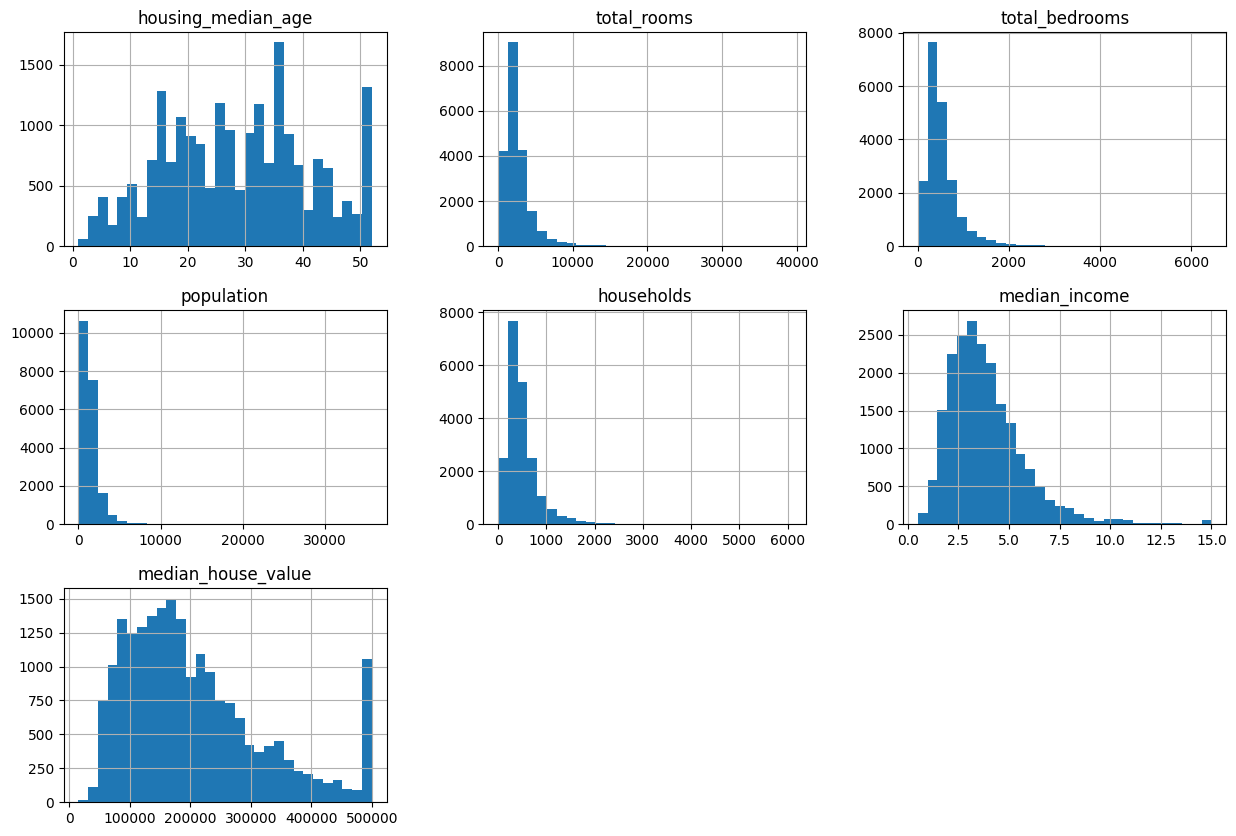

In [25]:
df_encoded.hist(bins =30, figsize=(15,10))
plt.show()

## Insights from the Histograms
- Right Skewed Features (many small values, few large):

- total_rooms, total_bedrooms, population, households, median_income

- These should be considered for log transformation to reduce skew and improve model performance.

## Near-Normal / Uniform:

- housing_median_age: Fairly uniform.

- median_house_value: Peaks at $500,000, which is a capped value (clip) — may distort regression.



## Data Transformation


In [26]:
skewed_cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

for col in skewed_cols:
    df_encoded[col] = np.log1p(df[col])  # log(1 + x)

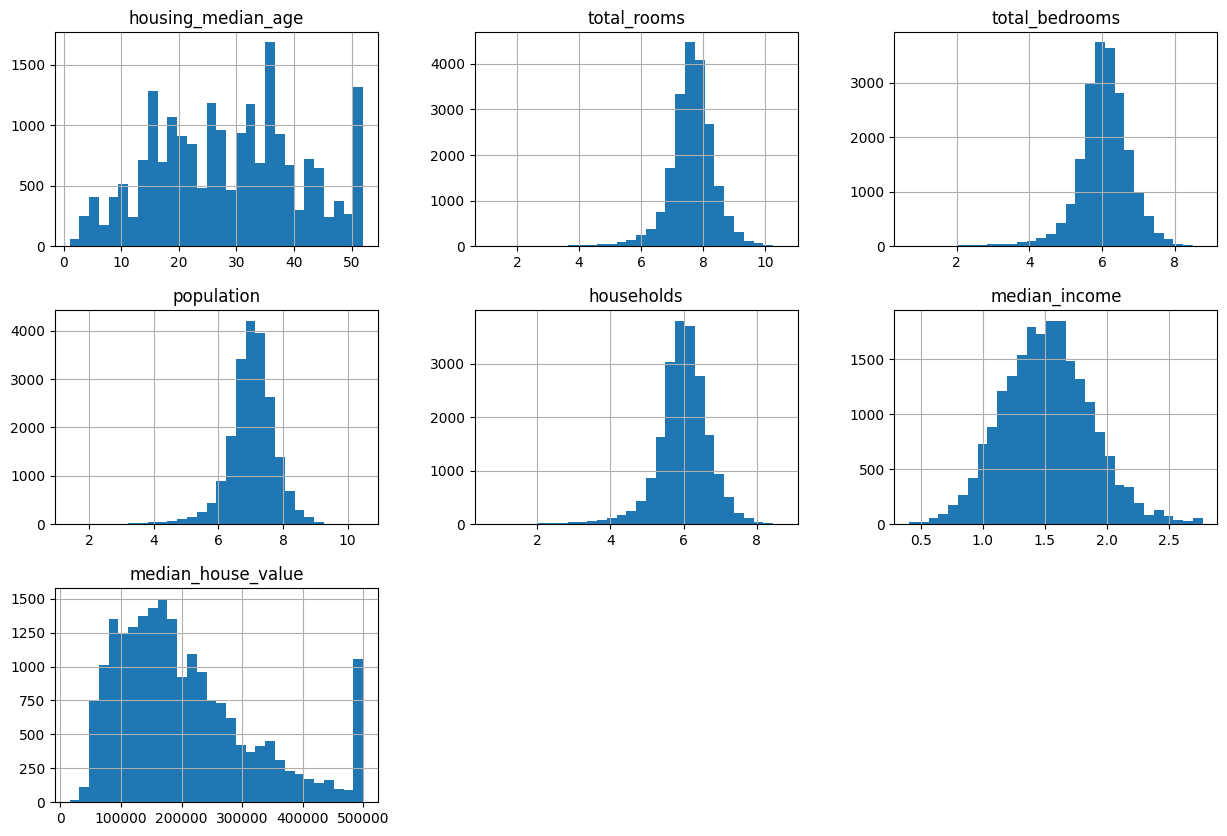

In [384]:
## Again check after update 
df_encoded.hist(bins =30, figsize=(15,10))
plt.show()

-  Log-transform improved normality of skewed features.
-  median_house_value has a spike at 500000 due to capping.
-  All features now look suitable for modeling.

1. housing_median_age
- Distribution: Fairly uniform with some peaks.

- Insight: Housing developments occurred across a wide range of years, with some spikes likely due to construction booms.

2. total_rooms (Log-Scaled)
- Distribution: Bell-shaped and slightly skewed.

- Insight: Most blocks have a log of total rooms centered around 7–8 (i.e., 1,000–3,000 rooms).

3. total_bedrooms (Log-Scaled)
- Distribution: Similar to total_rooms but with slightly fewer values.

- Insight: Follows a similar pattern, but fewer bedrooms compared to rooms, as expected.

4. population (Log-Scaled)
- Distribution: Right-skewed (tail toward higher values).

- Insight: Most blocks have moderate population; some have very high population densities.

5. households (Log-Scaled)
- Distribution: Similar to population.

- Insight: The number of households closely mirrors population; likely due to correlation.

6. median_income
- Distribution: Slightly right-skewed.

- Insight: Majority of areas have lower to mid-level incomes; very few areas with high income.



7. median_house_value
- Distribution: Right-skewed with a sharp cutoff near $500,000.

- Insight: Strong skew with a spike at the $500,000 mark suggests a capped value (often seen in this dataset). This artificial ceiling can impact model performance.

#### Summary of What to Do:
- Skewed features (population, total_rooms, etc.): May need log transformation (already shown here).

- Capped target (median_house_value): Consider removing or flagging capped values if doing regression.

- Income can be a strong predictor.

- Age, rooms, households show diverse patterns — useful for modeling.

 ## Handle the capped values

### Why do we need to handle capped values

If we  ignore the cap, our model:

- Underestimates expensive houses.

- Learns a misleading pattern near the max value.

- Gives biased regression coefficients.

So what do we do?
- Remove them → If your goal is to model realistic uncapped prices (simplest fix).

- Flag them → Add a feature like is_capped so the model knows these are special.

- Separate model → Use one regression model for uncapped values and a different approach for predicting luxury homes.

 2. Decide handling for capped values
Options:

- If you want realistic price prediction:
→ Remove capped values (best for regression).

- If you want to also learn about expensive homes:
→ Keep them, but add a “capped” flag.

#### For regression

In [27]:
df_encoded['capped'] = (df_encoded['median_house_value'] >= 500000).astype(int)

# Remove capped values
df_encoded = df_encoded[df_encoded['median_house_value'] < 500000]

In [28]:
df_encoded.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,capped
0,41,6.781058,4.867534,5.777652,4.844187,2.232720,452600,False,False,True,False,0
1,21,8.867850,7.009409,7.784057,7.037906,2.230165,358500,False,False,True,False,0
2,52,7.291656,5.252273,6.208590,5.181784,2.111110,352100,False,False,True,False,0
3,52,7.150701,5.463832,6.326149,5.393628,1.893579,341300,False,False,True,False,0
4,52,7.395108,5.638355,6.338594,5.560682,1.578195,342200,False,False,True,False,0


In [29]:
df_encoded.tail()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,capped
20635,25,7.418181,5.926926,6.740519,5.802118,0.940124,78100,True,False,False,False,0
20636,18,6.548219,5.017280,5.877736,4.744932,1.268861,77100,True,False,False,False,0
20637,17,7.720905,6.186209,6.915723,6.073045,0.993252,92300,True,False,False,False,0
20638,18,7.528869,6.016157,6.609349,5.857933,1.053336,84700,True,False,False,False,0
20639,16,7.932362,6.424869,7.235619,6.274762,1.220417,89400,True,False,False,False,0


In [30]:
df_encoded.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,capped
count,19648.000000,19648.000000,19448.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.0
mean,28.373066,7.623326,6.059378,7.037651,5.989163,1.488157,192055.328583,0.0
std,12.504050,0.748360,0.723106,0.734184,0.723717,0.330731,97110.854998,0.0
min,1.000000,1.098612,1.098612,1.386294,1.098612,0.405398,14999.000000,0.0
25%,18.000000,7.271704,5.697093,6.680855,5.645447,1.260249,116475.000000,0.0
50%,28.000000,7.655391,6.079933,7.073270,6.021023,1.492691,173600.000000,0.0
75%,37.000000,8.046229,6.475433,7.465798,6.408529,1.719637,247900.000000,0.0
max,52.000000,10.579514,8.771215,10.482430,8.713253,2.772595,499100.000000,0.0


#### Fix skewed features

Many features (like total_rooms, population) are skewed. Use log transform:

In [31]:
for col in ['total_rooms','total_bedrooms','population','households']:
    df_encoded[col] = np.log1p(df_encoded[col])  # log(1+x) to avoid -inf

#  Correlation Heatmap

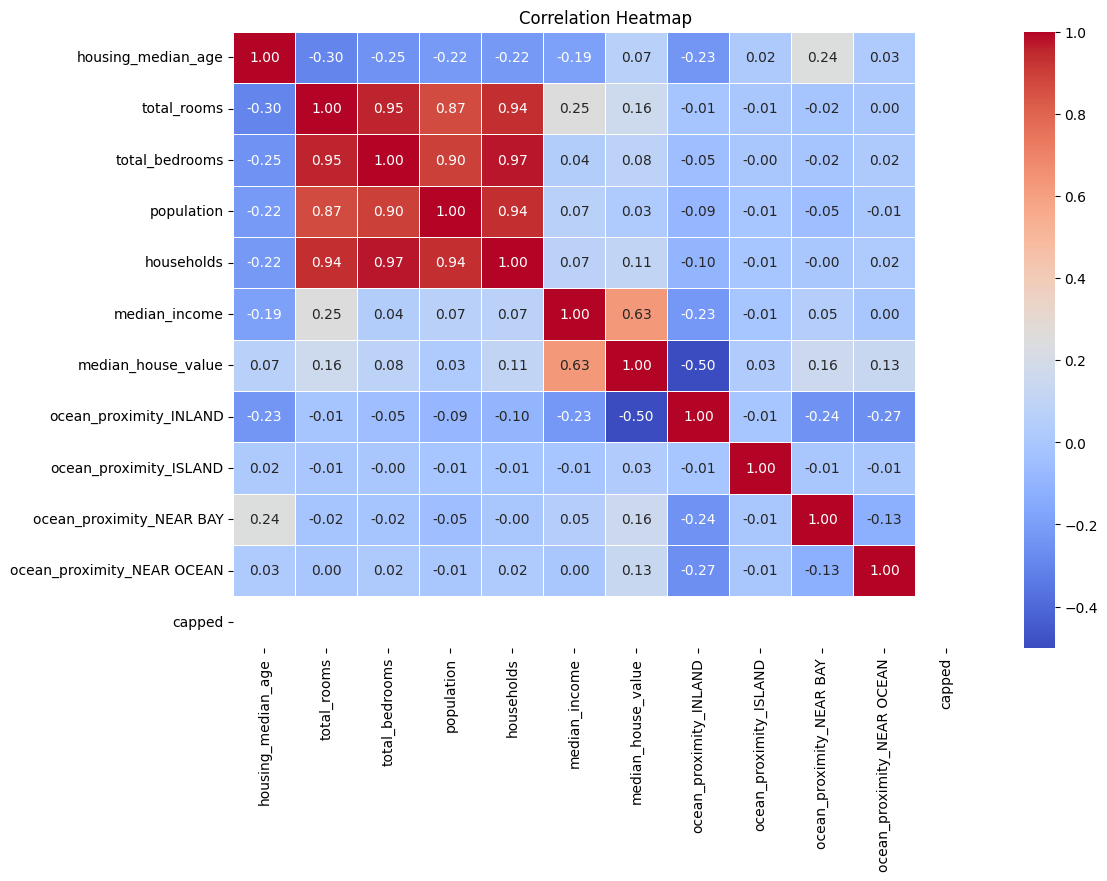

In [32]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Set plot size
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')
plt.show()

✅ What Is This Heatmap Showing?
- Values range from -1 to +1:

- +1: Perfect positive correlation (as one increases, the other increases).

- -1: Perfect negative correlation (as one increases, the other decreases).

- 0: No correlation.



#### Key Observations

1. Multicollinearity Detected
- You have very high correlations between these features:

| Feature Pair                     | Correlation          |
| -------------------------------- | -------------------- |
| `total_bedrooms` & `households`  | **0.97** ✅ Very High |
| `total_bedrooms` & `total_rooms` | **0.94** ✅ Very High |
| `population` & `households`      | **0.93** ✅ Very High |
| `population` & `total_rooms`     | **0.86** ✅ High      |


➡️ Recommendation: Keep only one of these highly correlated variables to avoid multicollinearity, which harms linear model performance.

➡️ Conclusion:

| Feature                               | Correlation                              |
| ------------------------------------- | ---------------------------------------- |
| `median_income`                       | **+0.67** ✅ Strong positive relationship |
| `ocean_proximity_INLAND`              | **-0.48** ❌ Negative effect              |
| `housing_median_age`                  | **+0.11** (weak)                         |
| `total_rooms`, `total_bedrooms`, etc. | \~0.05 to 0.16 → Weak correlation        |


3. About Dummy Variables

| Dummy Variable               | Impact on House Value         |
| ---------------------------- | ----------------------------- |
| `ocean_proximity_INLAND`     | **Strong negative (-0.48)** ❌ |
| `ocean_proximity_NEAR BAY`   | **Weak positive (+0.16)** 👍  |
| `ocean_proximity_NEAR OCEAN` | **Slight positive (+0.14)** ✅ |


## Now After Correlation Heatmap

### Identify Multicollinearity

In [33]:
# Find highly correlated features (correlation > 0.9 or < -0.9) 
corr_matrix = df_encoded.corr().abs()
corr_matrix

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,capped
housing_median_age,1.000000,0.299613,0.249457,0.217400,0.219362,0.190135,0.065139,0.232090,0.017898,0.244676,0.025647,NaN
total_rooms,0.299613,1.000000,0.953382,0.870097,0.935681,0.251840,0.164130,0.013890,0.006718,0.015535,0.000251,NaN
total_bedrooms,0.249457,0.953382,1.000000,0.898493,0.971317,0.042492,0.081771,0.052913,0.001292,0.015256,0.019952,NaN
population,0.217400,0.870097,0.898493,1.000000,0.936022,0.067978,0.027156,0.088656,0.012371,0.051834,0.007632,NaN
households,0.219362,0.935681,0.971317,0.936022,1.000000,0.074794,0.105154,0.096249,0.008294,0.004184,0.024057,NaN
median_income,0.190135,0.251840,0.042492,0.067978,0.074794,1.000000,0.630394,0.226456,0.008370,0.048251,0.002176,NaN
median_house_value,0.065139,0.164130,0.081771,0.027156,0.105154,0.630394,1.000000,0.499905,0.030951,0.155753,0.134291,NaN
ocean_proximity_INLAND,0.232090,0.013890,0.052913,0.088656,0.096249,0.226456,0.499905,1.000000,0.011247,0.243096,0.265276,NaN
ocean_proximity_ISLAND,0.017898,0.006718,0.001292,0.012371,0.008294,0.008370,0.030951,0.011247,1.000000,0.005502,0.006004,NaN
ocean_proximity_NEAR BAY,0.244676,0.015535,0.015256,0.051834,0.004184,0.048251,0.155753,0.243096,0.005502,1.000000,0.129756,NaN


In [34]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,capped
housing_median_age,NaN,0.299613,0.249457,0.217400,0.219362,0.190135,0.065139,0.232090,0.017898,0.244676,0.025647,NaN
total_rooms,NaN,NaN,0.953382,0.870097,0.935681,0.251840,0.164130,0.013890,0.006718,0.015535,0.000251,NaN
total_bedrooms,NaN,NaN,NaN,0.898493,0.971317,0.042492,0.081771,0.052913,0.001292,0.015256,0.019952,NaN
population,NaN,NaN,NaN,NaN,0.936022,0.067978,0.027156,0.088656,0.012371,0.051834,0.007632,NaN
households,NaN,NaN,NaN,NaN,NaN,0.074794,0.105154,0.096249,0.008294,0.004184,0.024057,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,0.630394,0.226456,0.008370,0.048251,0.002176,NaN
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499905,0.030951,0.155753,0.134291,NaN
ocean_proximity_INLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011247,0.243096,0.265276,NaN
ocean_proximity_ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005502,0.006004,NaN
ocean_proximity_NEAR BAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.129756,NaN


###  What it Does:
- It selects only the upper triangle of the correlation matrix — excluding the diagonal.

### Why It’s Done:
- The correlation matrix is symmetric, meaning:
- corr(A, B) = corr(B, A)
- So, we don’t need to check both sides. We only need one triangle (upper or lower) to avoid duplicate pairs.

In [35]:
# Display highly correlated pairs
high_corr = [(column, idx) for column in upper.columns for idx in upper.index if upper.loc[idx, column] > 0.9]
print("Highly Correlated Feature Pairs:\n", high_corr)

Highly Correlated Feature Pairs:
 [('total_bedrooms', 'total_rooms'), ('households', 'total_rooms'), ('households', 'total_bedrooms'), ('households', 'population')]


### Drop One of the Highly Correlated Columns

In [36]:
# Drop One of the Highly Correlated Columns (optional step based on EDA)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_encoded= df_encoded.drop(columns=to_drop)
print("Dropped Columns Due to Multicollinearity:", to_drop)

Dropped Columns Due to Multicollinearity: ['total_bedrooms', 'households']


#### Dropping one of the highly correlated columns is done to handle multicollinearity, which can negatively affect machine learning models — especially linear models.

### 🔍 What is Multicollinearity?

| ⚠️ Problem            | 📌 Why it's bad                                                                   |
| --------------------- | --------------------------------------------------------------------------------- |
| Redundant information | The model learns the same thing twice                                             |
| Unstable coefficients | Linear models (like regression) can't distinguish between the correlated features |
| Poor generalization   | Can cause overfitting or poor performance on test data                            |


#### ✅ Example:
- If total_rooms and households have a correlation = 0.95, they convey almost the same pattern. So we drop one to make the model simpler and more stable.

#### 🧠 Rule of Thumb:
- If we are  using tree-based models like Random :  Forest, XGBoost then  ✅ not always necessary.

- If we are using regression or logistic regression: ❗ important to handle multicollinearity.

#### Visualize Numeric Features

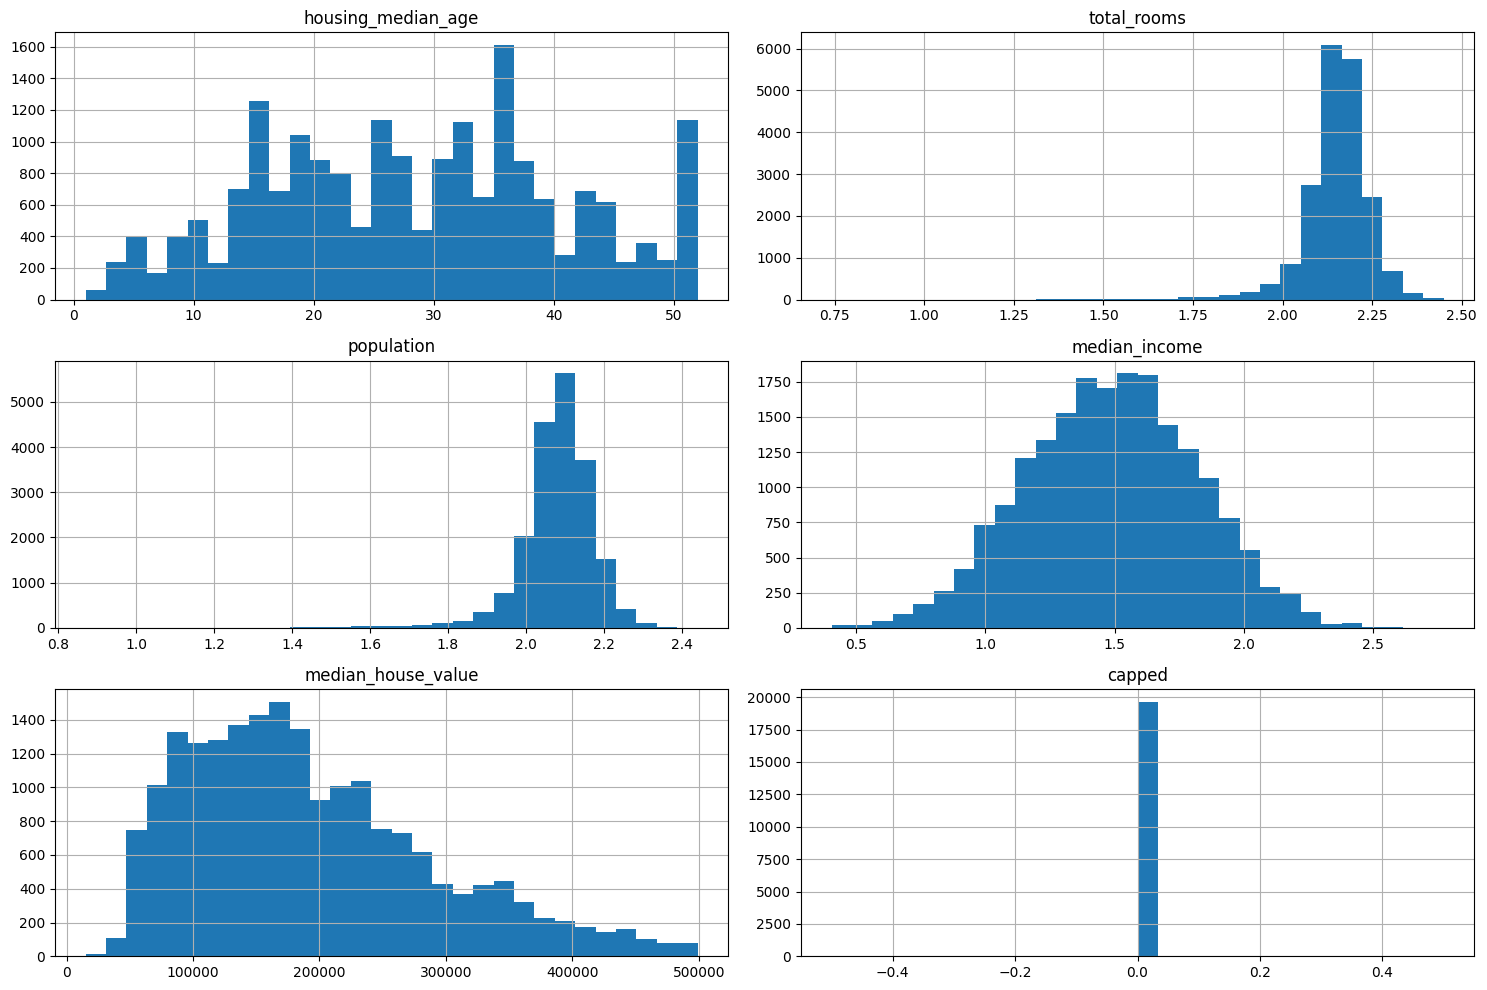

In [37]:
# Histogram for numerical columns
df_encoded.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Log-transform skewed features

To make them more normal:

In [38]:
for col in ['total_rooms', 'population']:
    df_encoded[col] = np.log1p(df_encoded[col])   # log(1+x)

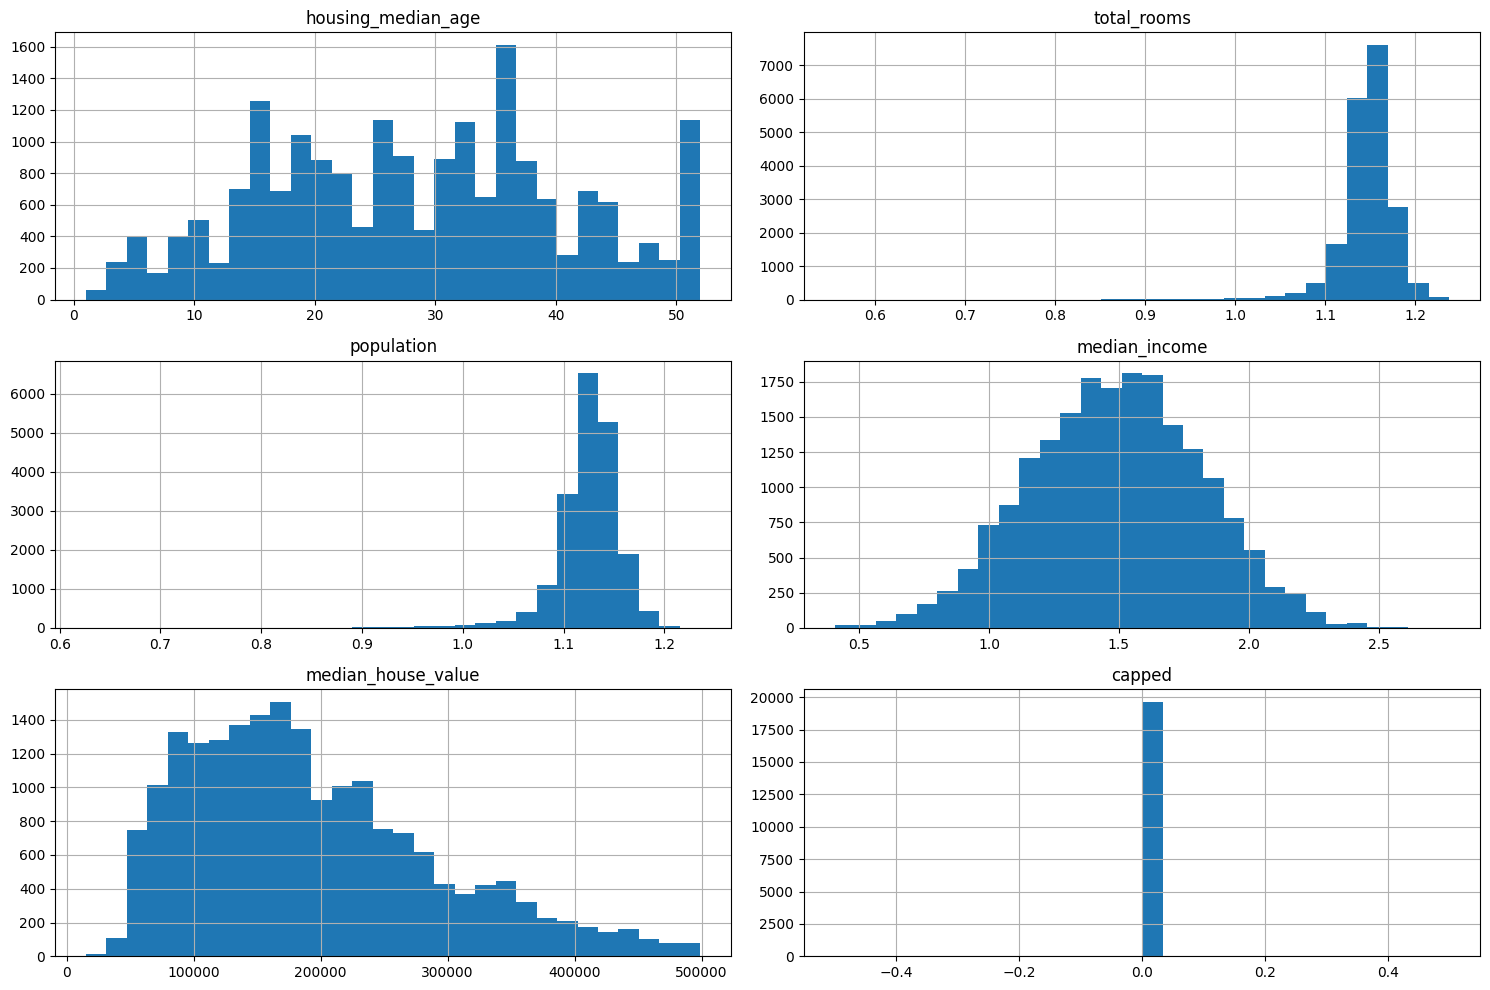

In [39]:
## check again noramlze or not 
# Histogram for numerical columns
df_encoded.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

####  Boxplot to Detect Outliers

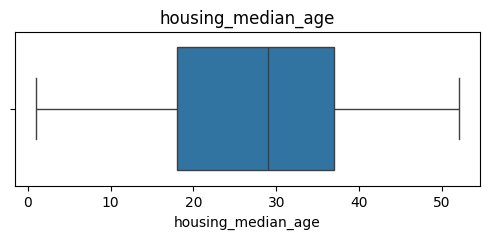

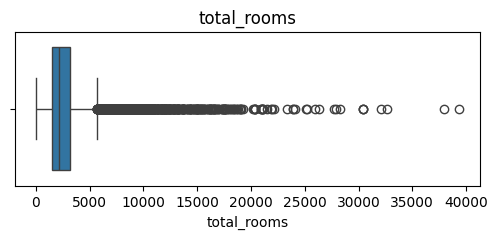

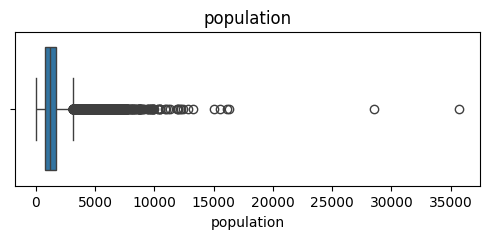

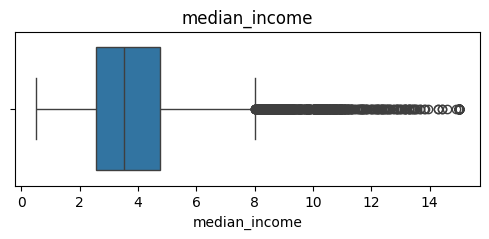

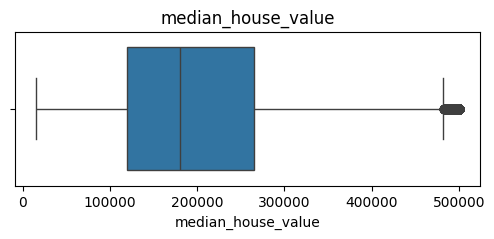

In [40]:
# Boxplot for each numerical column
for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

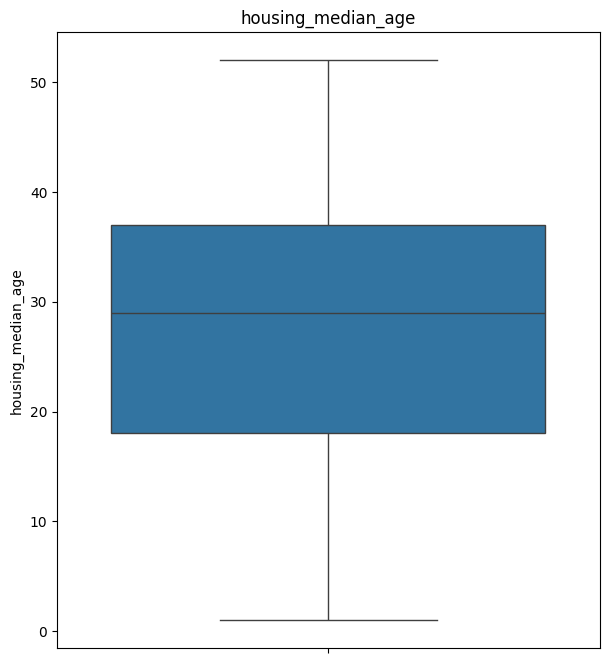

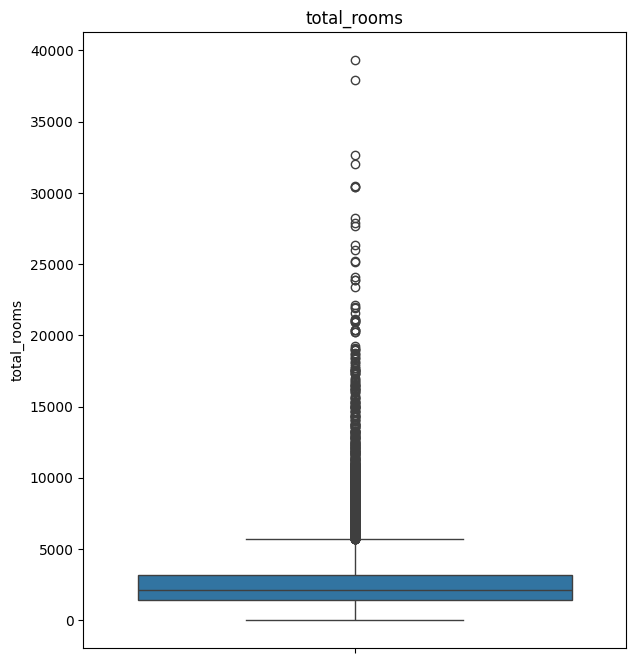

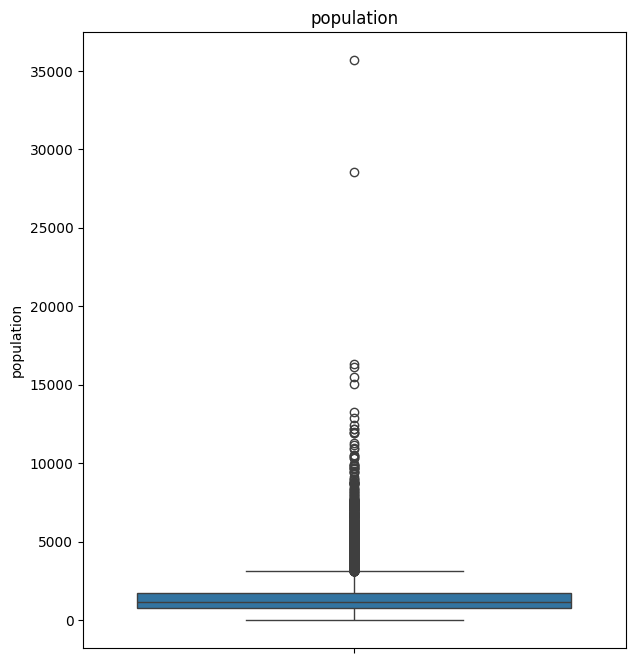

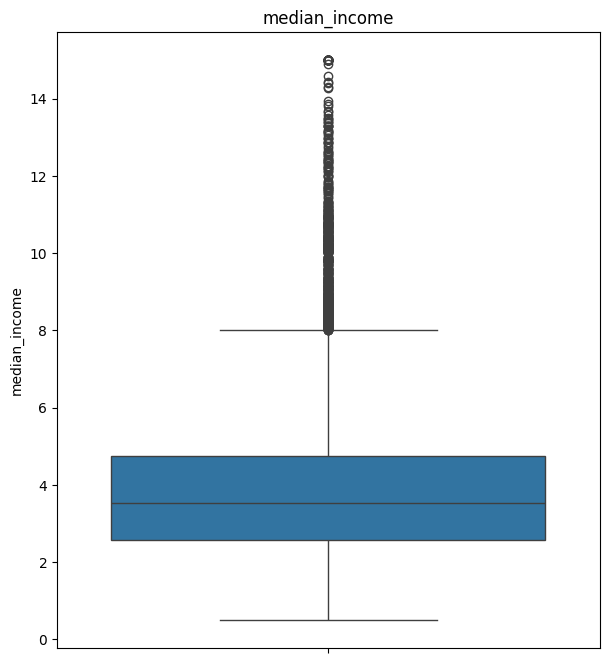

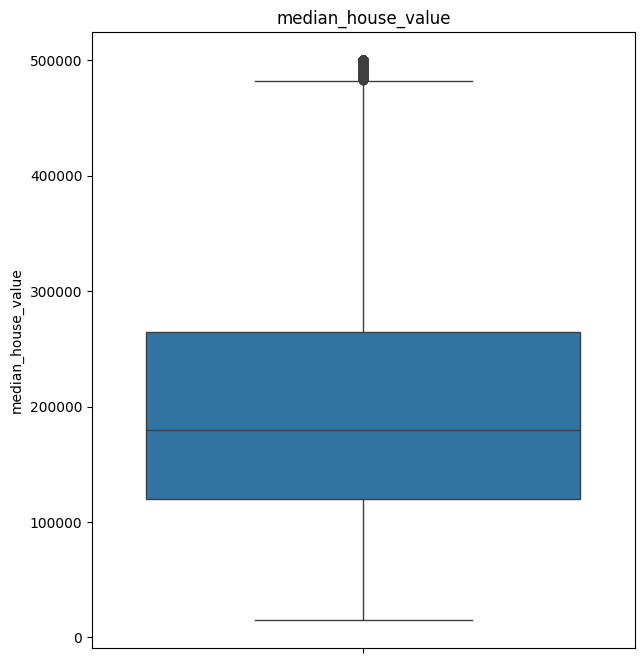

In [41]:
for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(7, 8))  # Taller for vertical plots
    sns.boxplot(y=df[col])      # Rotate: Use y instead of x
    plt.title(col)
    plt.show()

#### Automate for All Numerical Columns

In [42]:
def cap_outliers(df_encoded, col):
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_encoded[col] = df_encoded[col].clip(lower=lower_bound, upper=upper_bound)
    return df_encoded


In [43]:
for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns:
    df_encoded = cap_outliers(df_encoded,col)  # or remove_outliers_iqr


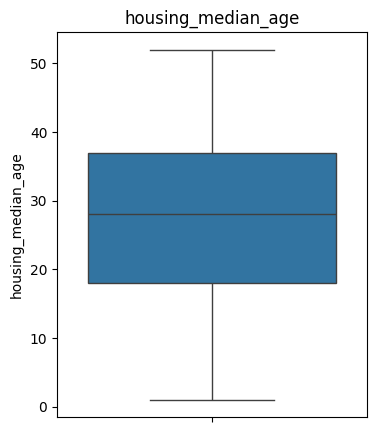

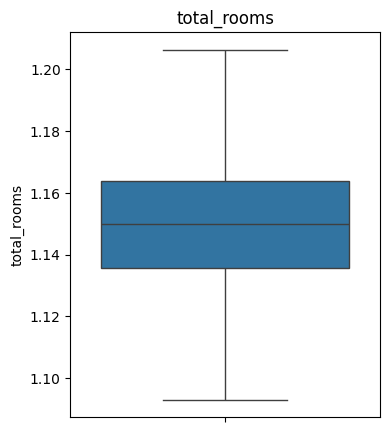

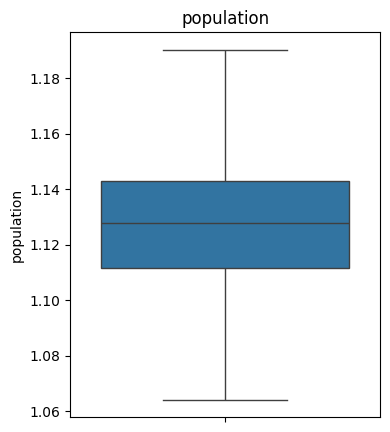

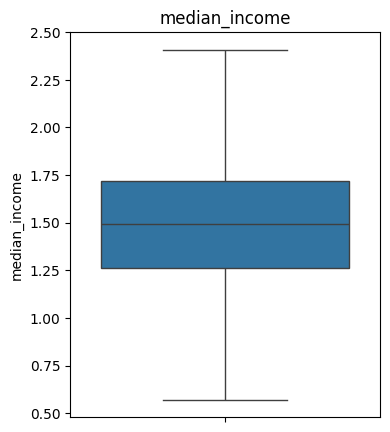

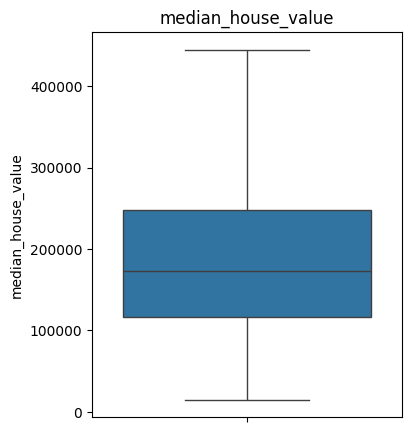

In [44]:
## Now check again
for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(4, 5))  # Taller for vertical plots
    sns.boxplot(y=df_encoded[col])      # Rotate: Use y instead of x
    plt.title(col)
    plt.show()

##### Now you can see all outliers removed

💡 Which Method Should We Use?

| Situation                        | Recommended Method          |
| -------------------------------- | --------------------------- |
| Regression/Distance-based models | Remove or Transform         |
| Tree-based models (e.g. RF, XGB) | Usually robust; outliers OK |
| Small dataset                    | Capping preferred           |
| Skewed distribution              | Log transformation          |


##  Feature Scaling

📌 Why Feature Scaling?
- Some ML algorithms (like Linear Regression, SVM, KNN) are sensitive to feature scales. We scale numerical features to bring them to a common scale.



In [45]:

# Copy dataframe
df_scaled = df_encoded.copy()

# Define columns
target_col = 'median_house_value'   # target
exclude_cols = [target_col, 'capped']  # exclude target & binary flags
numeric_cols = [col for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_cols]

# Scale only numeric predictors
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


#### Before scaling

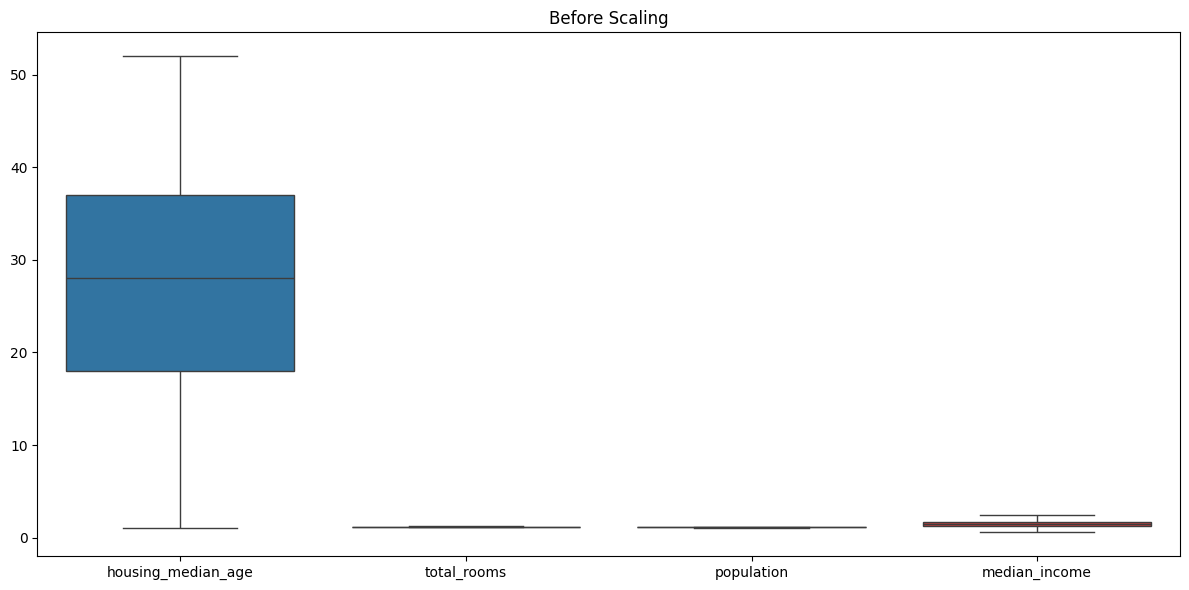

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded[numeric_cols], orient='v')
plt.title("Before Scaling")
plt.tight_layout()
plt.show()

#### After scaling

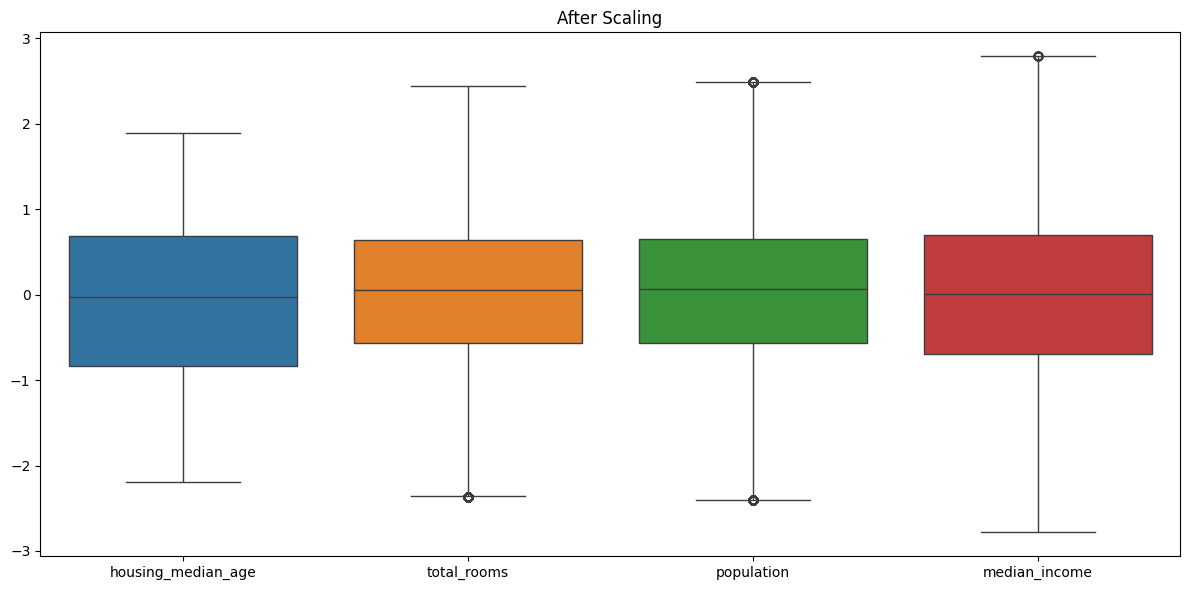

In [47]:
# After scaling
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[numeric_cols], orient='v')
plt.title("After Scaling")
plt.tight_layout()
plt.show()

#### Mean and Standard Deviation

In [48]:
df_scaled[numeric_cols].describe().T[['mean', 'std']]

,mean,std
housing_median_age,8.100650e-17,1.000025
total_rooms,2.015760e-15,1.000025
population,1.084908e-15,1.000025
median_income,3.992463e-16,1.000025


### ✅ Why Check Mean and Standard Deviation After Scaling?

- When you apply StandardScaler from sklearn.preprocessing, it transforms each feature using this formula:

## 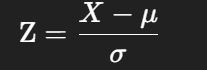

Where:

- X: original value

- μ: mean of the feature

- σ: standard deviation of the feature

- Z: standardized value (new value)

Goal of Standard Scaling:

- Mean of each feature becomes 0

- Standard deviation becomes 1

🔎 This will show a table like:
| Feature        | mean    | std     |
| -------------- | ------- | ------- |
| total\_rooms   | \~0.000 | \~1.000 |
| population     | \~0.000 | \~1.000 |
| median\_income | \~0.000 | \~1.000 |


✅ In summary:
| Metric          | Why it's important        |
| --------------- | ------------------------- |
| **Mean ≈ 0**    | Confirms data is centered |
| **Std Dev ≈ 1** | Confirms data is scaled   |


🧠 Interpretation:

✅ Means ≈ 0 → All numeric features are centered.

✅ Standard Deviations ≈ 1 → All numeric features are scaled to unit variance.

This is especially helpful for models like:

- Linear Regression

- Logistic Regression

- KNN

- SVM

- Principal Component Analysis (PCA)



#### Visualize Scaled Data Distribution

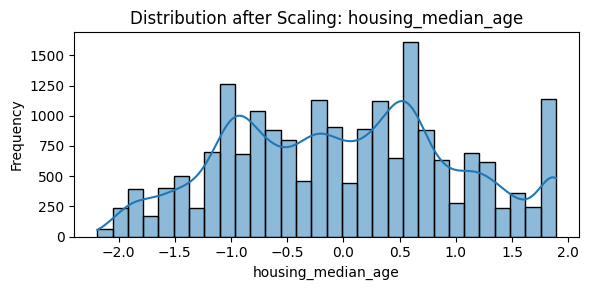

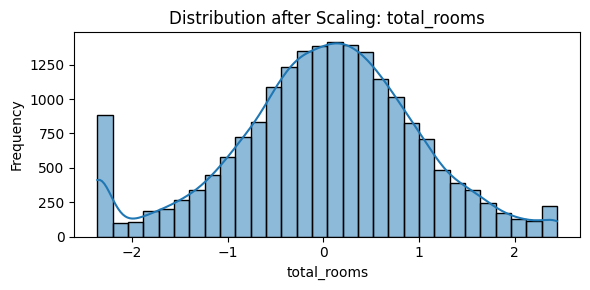

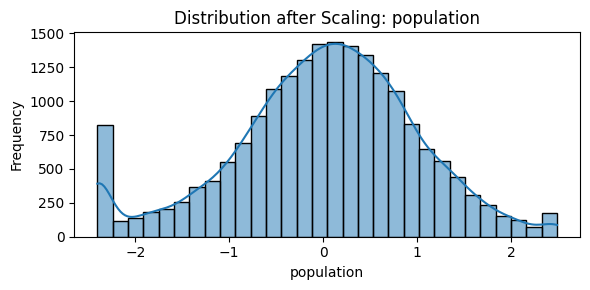

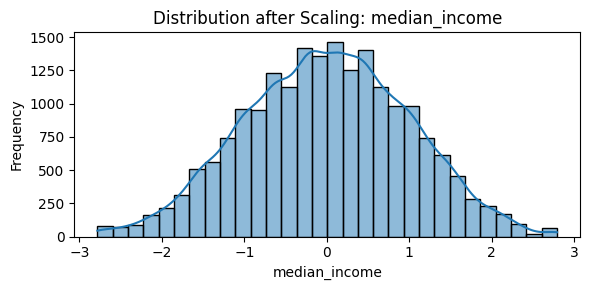

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_scaled[numeric_cols].select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_scaled[col], bins=30, kde=True)
    plt.title(f'Distribution after Scaling: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### We can use Subplots

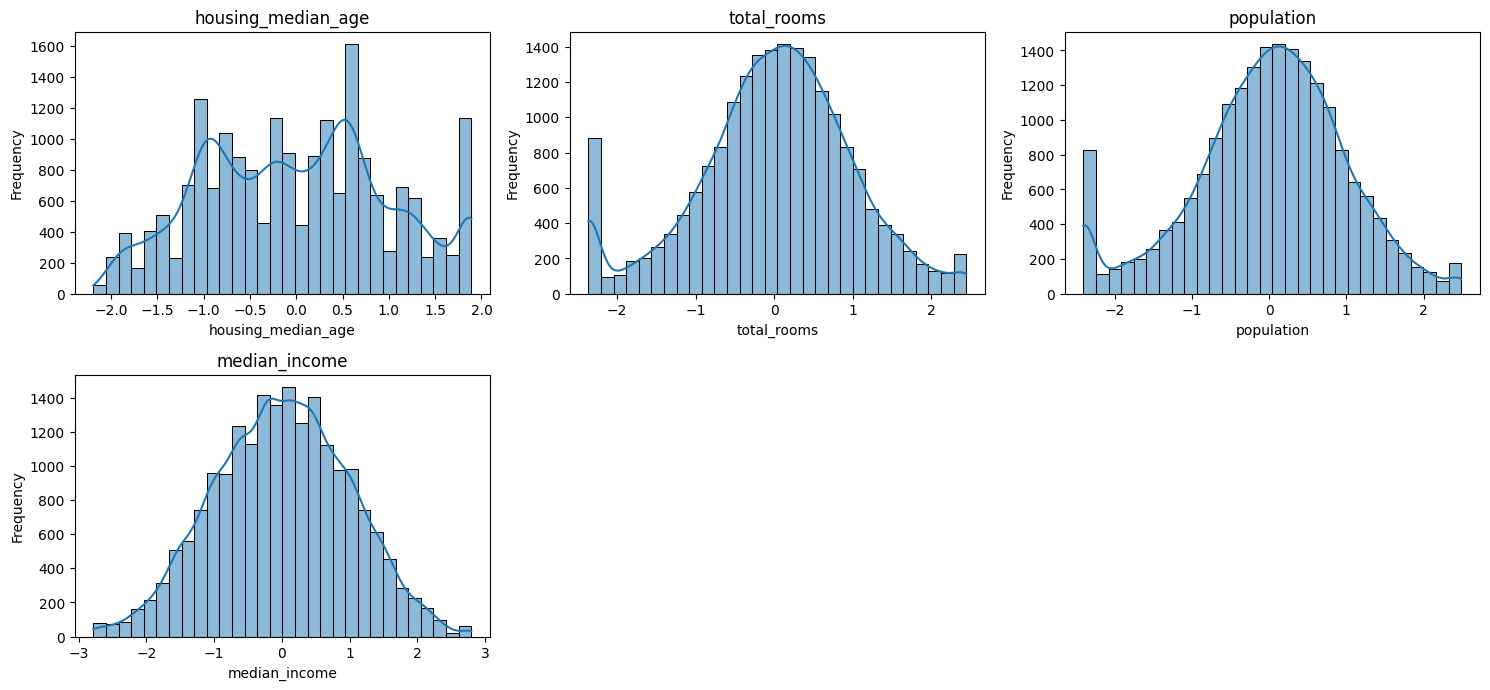

In [50]:
# Select 3 columns to demonstrate
cols = df_scaled[numeric_cols].select_dtypes(include=['float64', 'int64']).columns[:9]

plt.figure(figsize=(15, 10))  # Set size of full figure

for i, col in enumerate(cols, 1):  # i = 1, 2, 3
    plt.subplot(3, 3, i)  # 1 row, 3 columns, i-th subplot
    sns.histplot(df_scaled[col], bins=30, kde=True)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### we can see above all are correct 

In [51]:
df_scaled.describe()

,housing_median_age,total_rooms,population,median_income,median_house_value,capped
count,1.964800e+04,1.964800e+04,1.964800e+04,1.964800e+04,19648.000000,19648.0
mean,8.100650e-17,2.015760e-15,1.084908e-15,3.992463e-16,191678.041455,0.0
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,96055.872196,0.0
min,-2.189192e+00,-2.363803e+00,-2.402765e+00,-2.782392e+00,14999.000000,0.0
25%,-8.295976e-01,-5.611265e-01,-5.689098e-01,-6.915730e-01,116475.000000,0.0
50%,-2.983637e-02,5.191890e-02,6.196360e-02,1.370354e-02,173600.000000,0.0
75%,6.899487e-01,6.406581e-01,6.536603e-01,7.023062e-01,247900.000000,0.0
max,1.889591e+00,2.443335e+00,2.487515e+00,2.793125e+00,445037.500000,0.0


## Perfect — this summary tells us a lot about your final preprocessed dataset:

- Scaled features (housing_median_age, total_rooms, population, median_income):

- Mean ≈ 0 and Std ≈ 1 → confirms scaling is correct.

- Values are within roughly -2.5 to +2.8 (typical for z-scores, no extreme outliers).

- median_house_value (target):

- Still in original dollar scale (min ≈ 15k, max ≈ 445k).

- Good — you didn’t scale the target (correct for regression).

- capped:

- All 0 → means you removed all capped values (500k homes).

- So your dataset now only has uncapped houses, which is great for clean regression.



### Save the scaled_data and sclaled_pickle file

In [53]:
import os

# Make sure the folder exists
os.makedirs("models", exist_ok=True)

In [54]:
# Save the dataframe (CSV + Pickle)
df_scaled.to_csv("models/scaled_data.csv", index=False)
df_scaled.to_pickle("models/scaled_data.pkl")

### Feature Engineering process — step-by-step — specifically for a housing price prediction dataset like California Housing.

Load the data:

- import pandas as pd
- df = pd.read_csv("housing.csv")
- df.info()
- df.describe()
- df.head()

- Check columns & types (numeric, categorical, object).

Check for missing values:

- df.isnull().sum()


Recommendation:
If missing values are small (like <1%), you can drop them:

- df.dropna(inplace=True)

## Understand Data Distribution (EDA)

import matplotlib.pyplot as plt

import seaborn as sns

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    
    plt.figure(figsize=(6, 2))
    
    sns.boxplot(x=df[col])
    
    plt.title(f"Boxplot of {col}")
    
    plt.show()


##  Histograms for Distribution

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    
    plt.figure(figsize=(6, 3))
    
    sns.histplot(df[col], bins=30, kde=True)
    
    plt.title(f"Distribution of {col}")
    
    plt.show()


##  Correlation Analysis for Multicollinearity

plt.figure(figsize=(10, 6))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")

plt.show()


Drop highly correlated columns (correlation > 0.9 or similar):

- df.drop(['total_bedrooms', 'households'], axis=1, inplace=True)

## Handle Rare Categorical Values (like "ISLAND")

df['ocean_proximity'].value_counts()

If 'ISLAND' is too rare:

df = df[df['ocean_proximity'] != 'ISLAND']


## Encode Categorical Features

Using one-hot encoding:


df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

## Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)


## Combine Encoded Categorical with Scaled Data

categorical_cols = df.filter(regex='ocean_proximity_').columns

df_final = pd.concat([df_scaled, df[categorical_cols].reset_index(drop=True)], axis=1)


## Final Checks and Save Preprocessed Data

print(df_final.head())

df_final.to_csv("final_preprocessed_data.csv", index=False)


## Bonus (Target Variable Check)

y = df['median_house_value']

X = df_final.drop('median_house_value', axis=1, errors='ignore')  # errors='ignore' is safe
